In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tools import add_constant
import seaborn as sns


%matplotlib inline

In [51]:
iris = datasets.load_iris()

In [52]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [53]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target_names[iris.target]
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [55]:
x = df.drop(['target'], axis = 1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.75)

In [56]:
x_test.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
99,5.7,2.8,4.1,1.3
58,6.6,2.9,4.6,1.3
1,4.9,3.0,1.4,0.2
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1


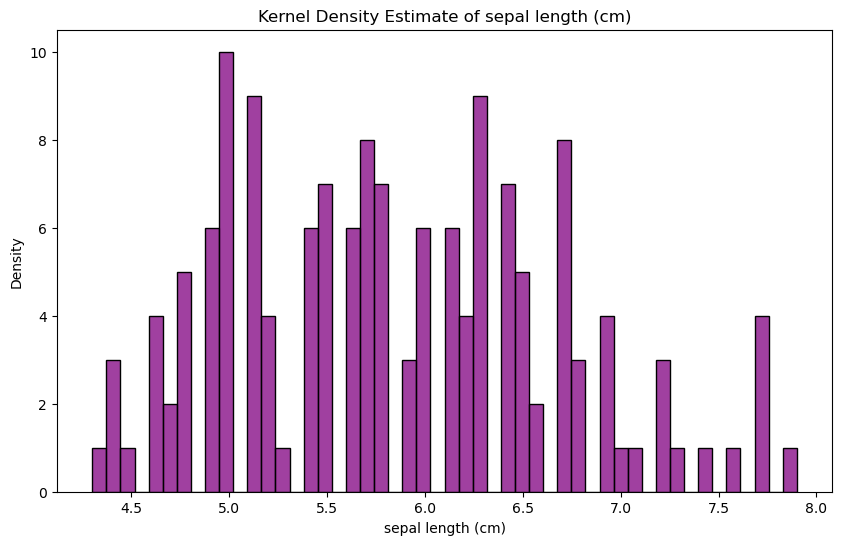

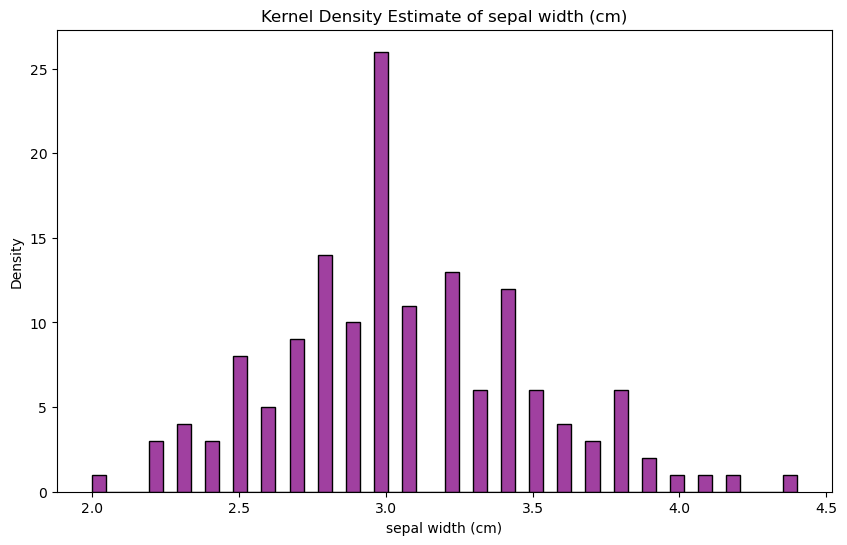

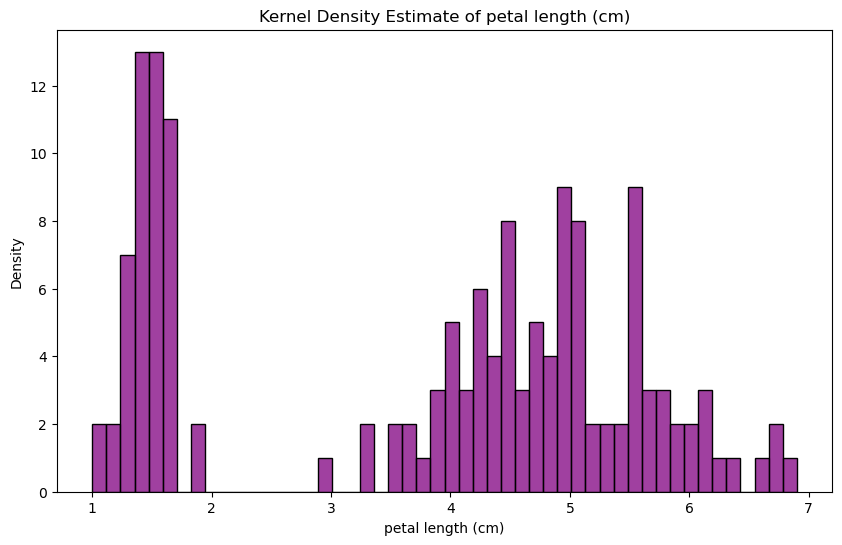

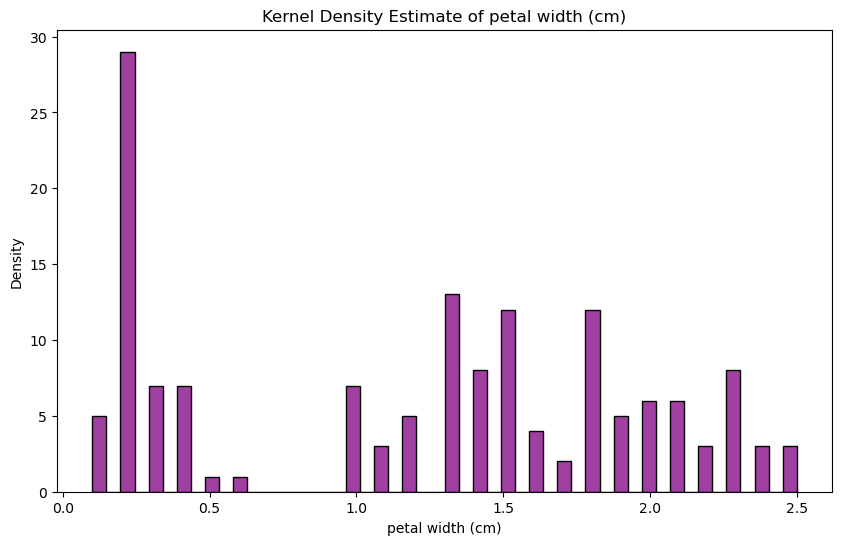

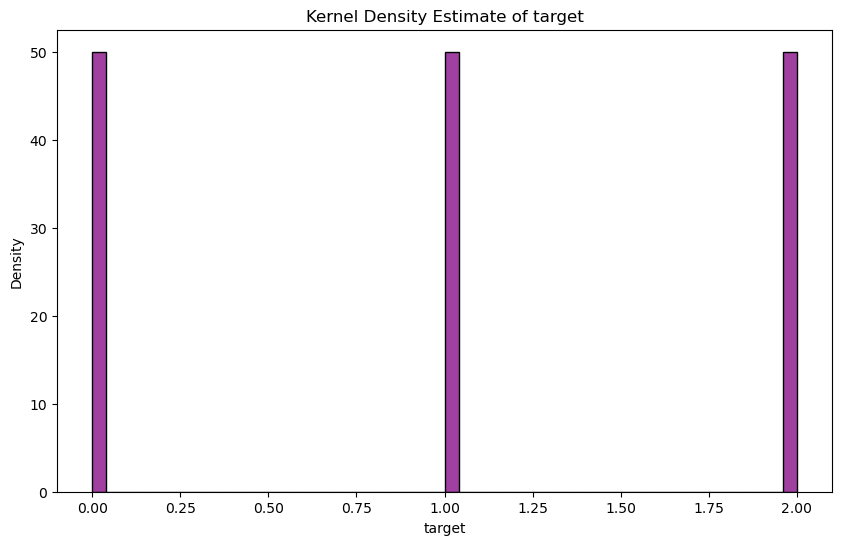

In [62]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins = 50, color = "purple")
    plt.title(f'Kernel Density Estimate of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()